In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from joblib import dump, load
import statistics as st

In [2]:
y   = load('ObsY.joblib').sel(time=slice('1980-12-1','2018-1-31'))
CNN = load('CNNY.joblib').sel(time=slice('1980-12-1','2018-1-31')) 
LR  = load('LRY.joblib').sel(time=slice('1980-12-1','2018-1-31')) 
SVR = load('SVRY.joblib').sel(time=slice('1980-12-1','2018-1-31')) 
#y=load('ObsY.joblib').sel(time=slice('1980-12-1','2018-1-31'))

#print(y.shape)

#print(y[y>0.44].count())
#print(CNN[CNN>0.46].count())
#print(LR[LR>0.46].count())
#print(SVR[SVR>0.46].count())

In [3]:
y20=y[y>0.76]

y20Table=[]

for i in y20:
    #print(i.time.values)
    dateStr=str(i.time.values)
    #print(dateStr)
    obsStr=str(i.values)
    #print(obsStr)
    LRStr=str(LR.sel(time=dateStr,method="nearest").values)
    #print(LRStr)
    SVRStr=str(SVR.sel(time=dateStr,method="nearest").values)
    #print(SVRStr)
    CNNStr=str(CNN.sel(time=dateStr,method="nearest").values)
    #print(CNNStr)
    
    y20Table.append(dateStr+","+obsStr+","+LRStr+","+SVRStr+","+CNNStr)

y20Table

['2000-01-02T00:00:00.000000000,0.84,0.44358058271519774,0.4679241235822844,0.5742274',
 '2000-01-03T00:00:00.000000000,0.8,0.45892079429814103,0.4860333905083416,0.61055785',
 '2000-01-05T00:00:00.000000000,0.8,0.48739334179498073,0.5122443474430889,0.7051297',
 '2001-01-12T00:00:00.000000000,0.88,0.43223538678107154,0.4115247706811034,0.6699011',
 '2002-01-02T00:00:00.000000000,0.92,0.4486570001268877,0.4606856989457939,0.8713053',
 '2002-01-03T00:00:00.000000000,0.84,0.42495985761780375,0.4454614858591541,0.905995',
 '2003-01-02T00:00:00.000000000,0.84,0.5628332199803125,0.5715653076022336,0.6500169',
 '2003-01-03T00:00:00.000000000,0.84,0.5085511400794775,0.46125571740408455,0.6408544',
 '2003-01-10T00:00:00.000000000,0.88,0.6238322842762383,0.6197972747310794,0.9491996',
 '2003-01-11T00:00:00.000000000,0.84,0.6036420368297541,0.5799222387598832,0.9352984',
 '2003-01-12T00:00:00.000000000,0.8,0.5808372664435577,0.5609948084118224,0.8072165',
 '2003-01-13T00:00:00.000000000,0.92,0.6

In [4]:
### no fog 0 (<=0.02) , medium fog 1-11 (>0.02 && <=0.46) , widespread fog >11 (>0.46)
nf=list()
nLR=list()
nSVR=list()
nCNN=list()

ff=list()
fLR=list()
fSVR=list()
fCNN=list()

medf=list()
medLR=list()
medSVR=list()
medCNN=list()

wdf=list()
wdLR=list()
wdSVR=list()
wdCNN=list()

for yr in range(1981,2019,1):
    #print(yr)
    dStart=datetime.datetime(yr-1, 12, 1)
    #print(dStart)
    dEnd=datetime.datetime(yr, 1, 31)
    #print(dEnd)
    yAct = y.sel(time=slice(dStart,dEnd))
    yCNN = CNN.sel(time=slice(dStart,dEnd))
    yLR  = LR.sel(time=slice(dStart,dEnd))
    ySVR = SVR.sel(time=slice(dStart,dEnd))
    
    ff.append(yAct.mean())
    fLR.append(yLR.mean())
    fSVR.append(ySVR.mean())
    fCNN.append(yCNN.mean())
    
    nf.append(yAct[yAct<0.040].shape[0])
    nLR.append(yLR[yLR<0.040].shape[0])
    nSVR.append(ySVR[ySVR<0.040].shape[0])
    nCNN.append(yCNN[yCNN<0.040].shape[0])
    
    
    medf.append(yAct[(yAct<=0.46) & (yAct>=0.04)].shape[0])
    medLR.append(yLR[(yLR<=0.46) & (yLR>=0.04)].shape[0])
    medSVR.append(ySVR[(ySVR<=0.46) & (ySVR>=0.04)].shape[0])
    medCNN.append(yCNN[(yCNN<=0.46) & (yCNN>=0.04)].shape[0])
    
    wdf.append(yAct[yAct>0.46].shape[0])
    wdLR.append(yLR[yLR>0.46].shape[0])
    wdSVR.append(ySVR[ySVR>0.46].shape[0])
    wdCNN.append(yCNN[yCNN>0.46].shape[0])
    
    
######### statistics for each group
meanVals = [st.mean(nf),st.mean(nLR),st.mean(nSVR),st.mean(nCNN),
            st.mean(medf),st.mean(medLR),st.mean(medSVR),st.mean(medCNN),
            st.mean(wdf),st.mean(wdLR),st.mean(wdSVR),st.mean(wdCNN)]
stdVals  = [st.stdev(nf),st.stdev(nLR),st.stdev(nSVR),st.stdev(nCNN),
            st.stdev(medf),st.stdev(medLR),st.stdev(medSVR),st.stdev(medCNN),
            st.stdev(wdf),st.stdev(wdLR),st.stdev(wdSVR),st.stdev(wdCNN)]

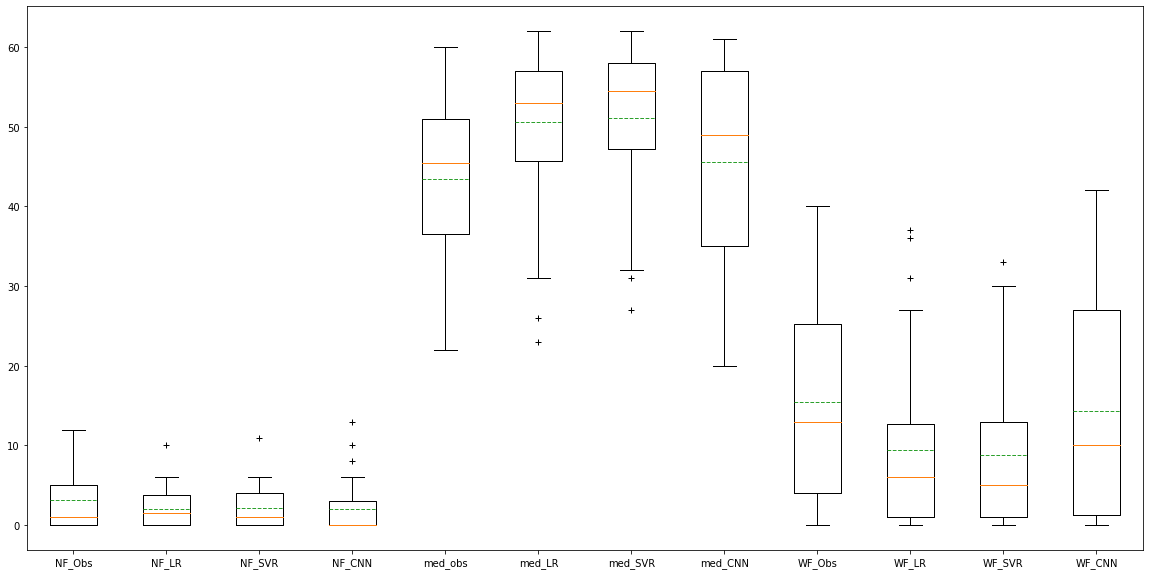

In [5]:
fig, ax = plt.subplots(figsize=(20, 10))
columns = [nf,nLR,nSVR,nCNN,medf,medLR,medSVR,medCNN,wdf,wdLR,wdSVR,wdCNN]
ax.boxplot(columns,0,'+',  meanline=True, showmeans=True)
plt.xticks([1, 2,3,4,5,6,7,8,9,10,11,12], ["NF_Obs", "NF_LR", "NF_SVR", "NF_CNN",
                                          "med_obs", "med_LR", "med_SVR", "med_CNN",
                                          "WF_Obs", "WF_LR", "WF_SVR", "WF_CNN"])


plt.savefig('Obs_box.png')
plt.show()

[3.8258683782633147, 2.426735861538812, 2.4772076235636407, 3.1101174777590486, 10.399146479912117, 10.001884601930136, 9.276379094444161, 12.52593326931871, 12.240245630164903, 10.713818996811726, 9.817683699784714, 13.73970583231183]


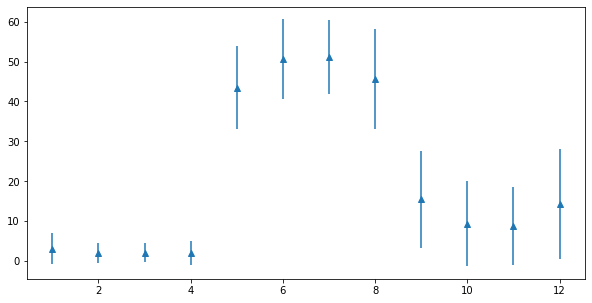

In [6]:
fig = plt.figure(figsize=[10,5])
x=[1, 2,3,4,5,6,7,8,9,10,11,12]
plt.errorbar(x, meanVals, stdVals, linestyle='None', marker='^')
#print(meanVals)
print(stdVals)

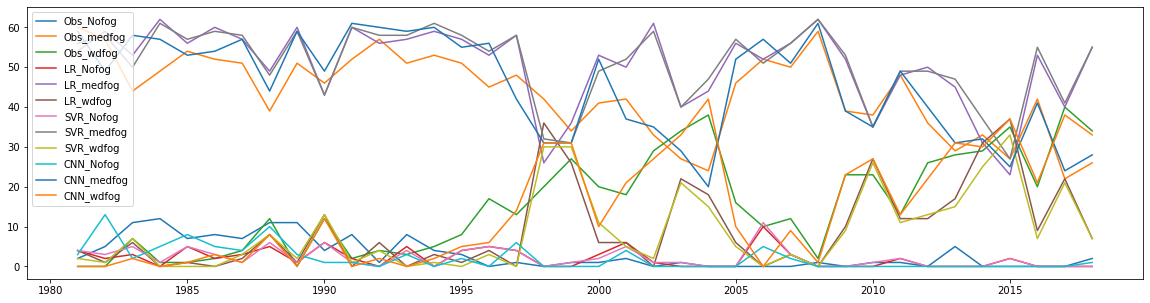

In [7]:
plt.figure(figsize=[20,5])
X=np.arange(1981,2019)
plt.plot(X,nf,label='Obs_Nofog')
plt.plot(X,medf,label='Obs_medfog')
plt.plot(X,wdf,label='Obs_wdfog')

plt.plot(X,nLR,label='LR_Nofog')
plt.plot(X,medLR,label='LR_medfog')
plt.plot(X,wdLR,label='LR_wdfog')

plt.plot(X,nSVR,label='SVR_Nofog')
plt.plot(X,medSVR,label='SVR_medfog')
plt.plot(X,wdSVR,label='SVR_wdfog')

plt.plot(X,nCNN,label='CNN_Nofog')
plt.plot(X,medCNN,label='CNN_medfog')
plt.plot(X,wdCNN,label='CNN_wdfog')
plt.legend()

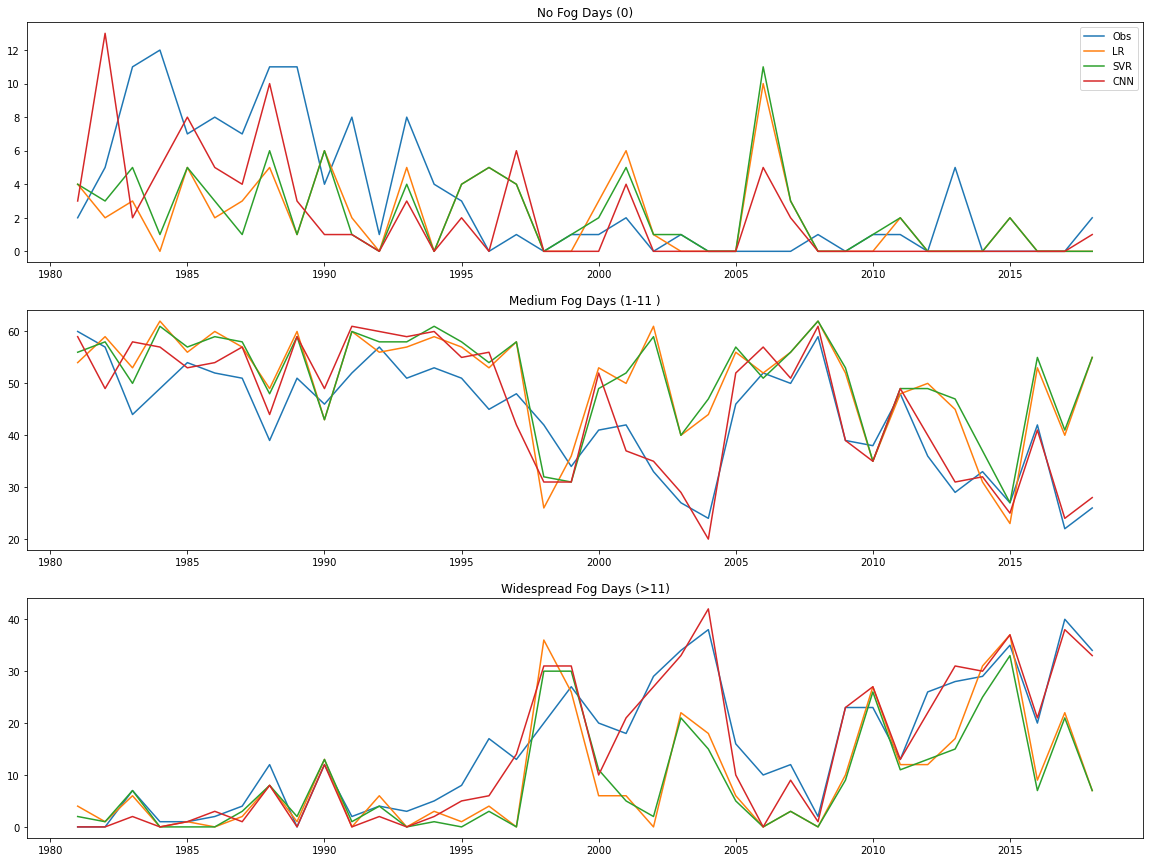

In [8]:
fig=plt.figure(figsize=[20,15])
X=np.arange(1981,2019)
ax = fig.add_subplot(311)
ax.plot(X,nf,label='Obs')
ax.plot(X,nLR,label='LR')
ax.plot(X,nSVR,label='SVR')
ax.plot(X,nCNN,label='CNN')
ax.legend()
ax.set_title('No Fog Days (0)')

ax1 = fig.add_subplot(312)
ax1.plot(X,medf,label='Obs_medfog')
ax1.plot(X,medLR,label='LR_medfog')
ax1.plot(X,medSVR,label='SVR_medfog')
ax1.plot(X,medCNN,label='CNN_medfog')
#ax1.legend()
ax1.set_title('Medium Fog Days (1-11 )')

ax2 = fig.add_subplot(313)
ax2.plot(X,wdf,label='Obs_wdfog')
ax2.plot(X,wdLR,label='LR_wdfog')
ax2.plot(X,wdSVR,label='SVR_wdfog')
ax2.plot(X,wdCNN,label='CNN_wdfog')
#ax2.legend()
ax2.set_title('Widespread Fog Days (>11)' )

plt.savefig('Obs_TS.png')

In [9]:
nf[0]+medf[0]+wdf[0]

62

In [10]:
nf[1]+medf[1]+wdf[1]

62

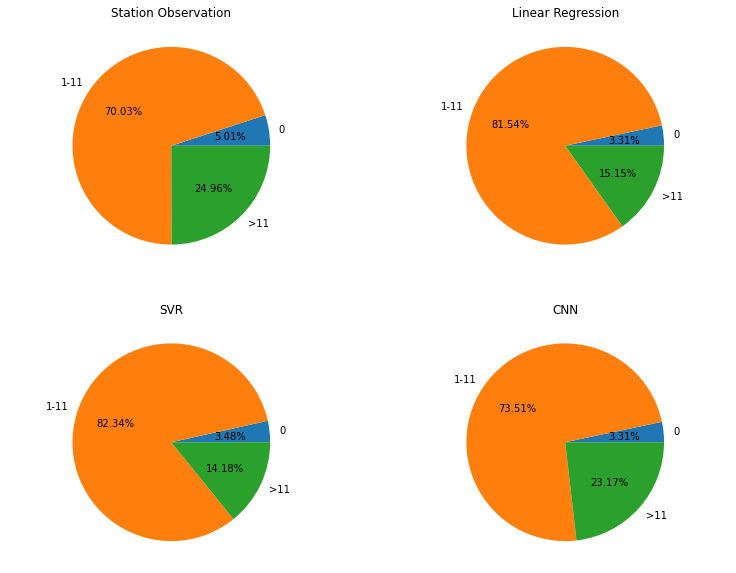

In [11]:
fig = plt.figure(figsize=(20,10))
pieLabs = ['0', '1-11', '>11']
ax = fig.add_subplot(235)
ax.axis('equal')
ax.pie([sum(nCNN),sum(medCNN),sum(wdCNN)], labels = pieLabs,autopct='%1.2f%%')
ax.set_title('CNN')

ax1 = fig.add_subplot(234)
ax1.axis('equal')
ax1.pie([sum(nSVR),sum(medSVR),sum(wdSVR)], labels = pieLabs,autopct='%1.2f%%')
ax1.set_title('SVR')

ax2 = fig.add_subplot(231)
ax2.axis('equal')
#pieLabs = ['No Fog', 'Intermediate Fog (1-11)', 'Widespread Fog (>11)']
ax2.pie([sum(nf),sum(medf),sum(wdf)], labels = pieLabs,autopct='%1.2f%%')
ax2.set_title('Station Observation')


ax3 = fig.add_subplot(232)
ax3.axis('equal')
#pieLabs = ['No Fog', 'Intermediate Fog (1-11)', 'Widespread Fog (>11)']
ax3.pie([sum(nLR),sum(medLR),sum(wdLR)], labels = pieLabs,autopct='%1.2f%%')
ax3.set_title('Linear Regression')
plt.savefig('Obs_pie.eps')

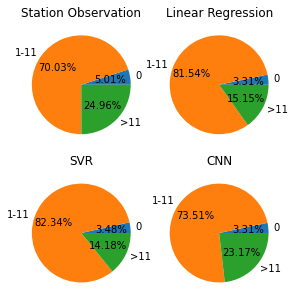

In [12]:
fig = plt.figure(figsize=(7,5))
pieLabs = ['0', '1-11', '>11']
ax = fig.add_subplot(235)
ax.axis('equal')
ax.pie([st.mean(nCNN),st.mean(medCNN),st.mean(wdCNN)], labels = pieLabs,autopct='%1.2f%%')
ax.set_title('CNN')

ax1 = fig.add_subplot(234)
ax1.axis('equal')
ax1.pie([st.mean(nSVR),st.mean(medSVR),st.mean(wdSVR)], labels = pieLabs,autopct='%1.2f%%')
ax1.set_title('SVR')

ax2 = fig.add_subplot(231)
ax2.axis('equal')
#pieLabs = ['No Fog', 'Intermediate Fog (1-11)', 'Widespread Fog (>11)']
ax2.pie([st.mean(nf),st.mean(medf),st.mean(wdf)], labels = pieLabs,autopct='%1.2f%%')
ax2.set_title('Station Observation')


ax3 = fig.add_subplot(232)
ax3.axis('equal')
#pieLabs = ['No Fog', 'Intermediate Fog (1-11)', 'Widespread Fog (>11)']
ax3.pie([st.mean(nLR),st.mean(medLR),st.mean(wdLR)], labels = pieLabs,autopct='%1.2f%%')
ax3.set_title('Linear Regression')
plt.savefig('Obs_pie.png')

[[1.         0.76134145]
 [0.76134145 1.        ]]
[[1.         0.77995868]
 [0.77995868 1.        ]]
[[1.         0.97426947]
 [0.97426947 1.        ]]
[[1.       0.699665]
 [0.699665 1.      ]]
[[1.         0.71987355]
 [0.71987355 1.        ]]
[[1.         0.95625686]
 [0.95625686 1.        ]]


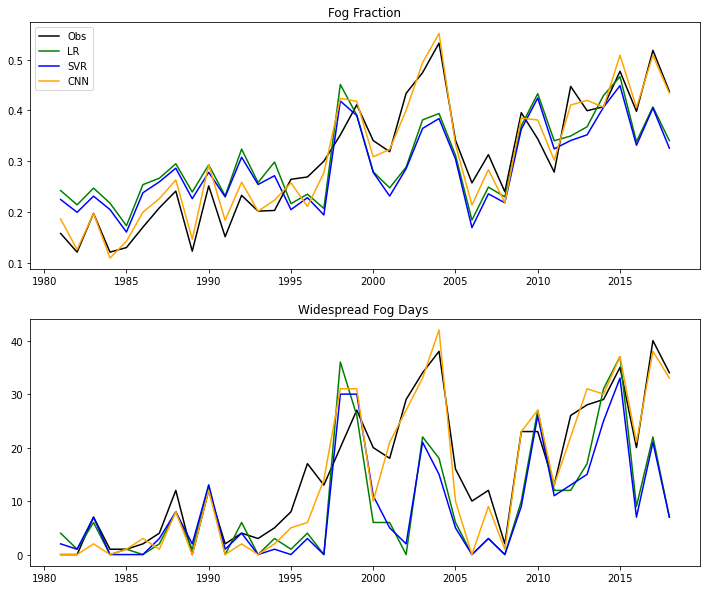

In [13]:
fig=plt.figure(figsize=[12,10])
X=np.arange(1981,2019)


ax1 = fig.add_subplot(211)
ax1.plot(X,ff,label='Obs',color='black')
ax1.plot(X,fLR,label='LR',color='green')
ax1.plot(X,fSVR,label='SVR',color='blue')
ax1.plot(X,fCNN,label='CNN',color='orange')
ax1.legend()
print(np.corrcoef(ff,fLR))
print(np.corrcoef(ff,fSVR))
print(np.corrcoef(ff,fCNN))
ax1.set_title('Fog Fraction')

ax2 = fig.add_subplot(212)
ax2.plot(X,wdf,label='Obs_wdfog', color='black')
ax2.plot(X,wdLR,label='LR_wdfog',color='green')
ax2.plot(X,wdSVR,label='SVR_wdfog',color='blue')
ax2.plot(X,wdCNN,label='CNN_wdfog',color='orange')
print(np.corrcoef(wdf,wdLR))
print(np.corrcoef(wdf,wdSVR))
print(np.corrcoef(wdf,wdCNN))
#ax2.legend()
ax2.set_title('Widespread Fog Days ' )

plt.savefig('Obs_TS.png')

Text(0.5, 1.0, 'Fog Fraction')

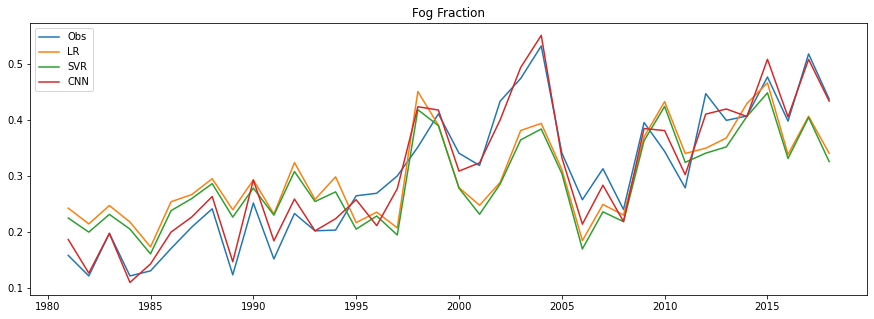

In [14]:
fig=plt.figure(figsize=[15,5])
X=np.arange(1981,2019)
plt.plot(X,ff,label='Obs')
plt.plot(X,fLR,label='LR')
plt.plot(X,fSVR,label='SVR')
plt.plot(X,fCNN,label='CNN')
plt.legend()
plt.title('Fog Fraction')

In [15]:
y.shape[0]

2356

In [16]:
dateString=[]
for i in y.time.values :
    dateString.append(np.datetime_as_string(i, unit='D'))

#print(dateString) 
dateString[2355]

'2018-01-31'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[[1.         0.72199668]
 [0.72199668 1.        ]]


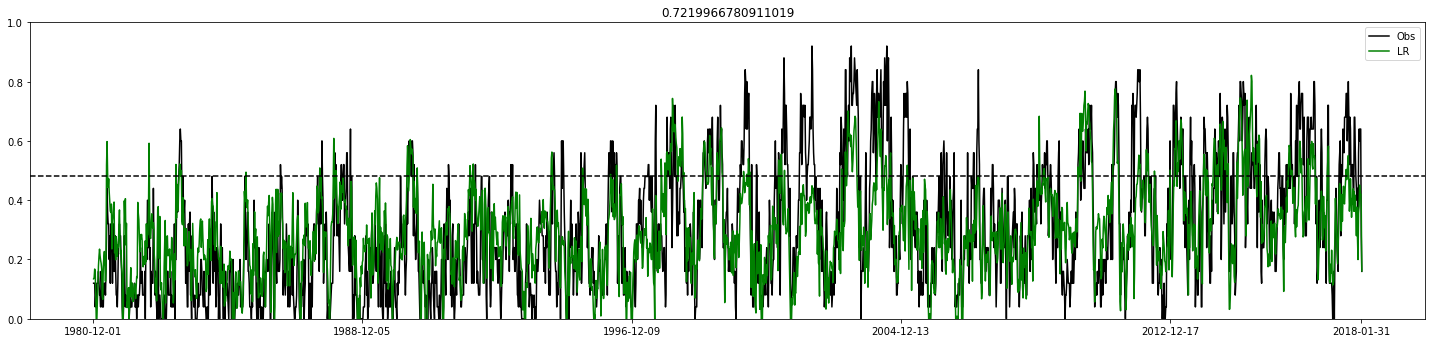

In [17]:
fig=plt.figure(figsize=[25,12])
X=np.arange(1,y.shape[0]+1)
#X=y.time.values


ax1 = fig.add_subplot(211)
ax1.plot(X,y,label='Obs',color='black')
ax1.plot(X,LR,label='LR',color='green')
ax1.set_xticks([0,500,1000,1500,2000,2355])
ax1.set_xticklabels([dateString[0], dateString[500],dateString[1000], dateString[1500], dateString[2000],dateString[2355]])
l1=ax1.axhline(0.48,color='black',ls='--')
ax1.set_ylim([0, 1])
ax1.legend()
ax1.set_title(np.corrcoef(y,LR)[0,1])
print(np.corrcoef(y,LR))
plt.savefig('LR_dailyTS.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[[1.         0.74638671]
 [0.74638671 1.        ]]


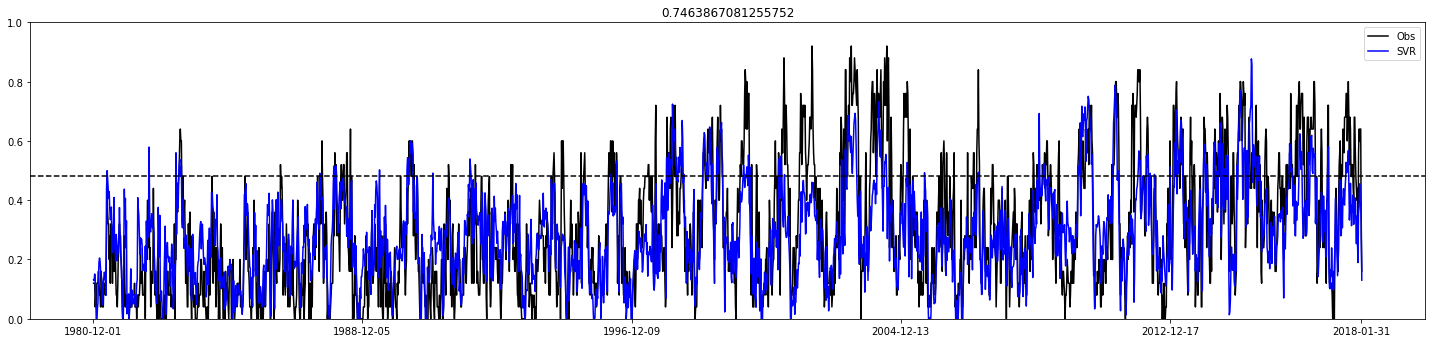

In [18]:
fig=plt.figure(figsize=[25,12])
X=np.arange(1,y.shape[0]+1)
#X=y.time.values


ax1 = fig.add_subplot(211)
ax1.plot(X,y,label='Obs',color='black')
ax1.plot(X,SVR,label='SVR',color='blue')
ax1.set_xticks([0,500,1000,1500,2000,2355])
ax1.set_xticklabels([dateString[0], dateString[500],dateString[1000], dateString[1500], dateString[2000],dateString[2355]])
l1=ax1.axhline(0.48,color='black',ls='--')
ax1.legend()
ax1.set_ylim([0, 1])
ax1.set_title(np.corrcoef(y,SVR)[0,1])
print(np.corrcoef(y,SVR))
plt.savefig('SVR_dailyTS.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[[1.         0.90901055]
 [0.90901055 1.        ]]


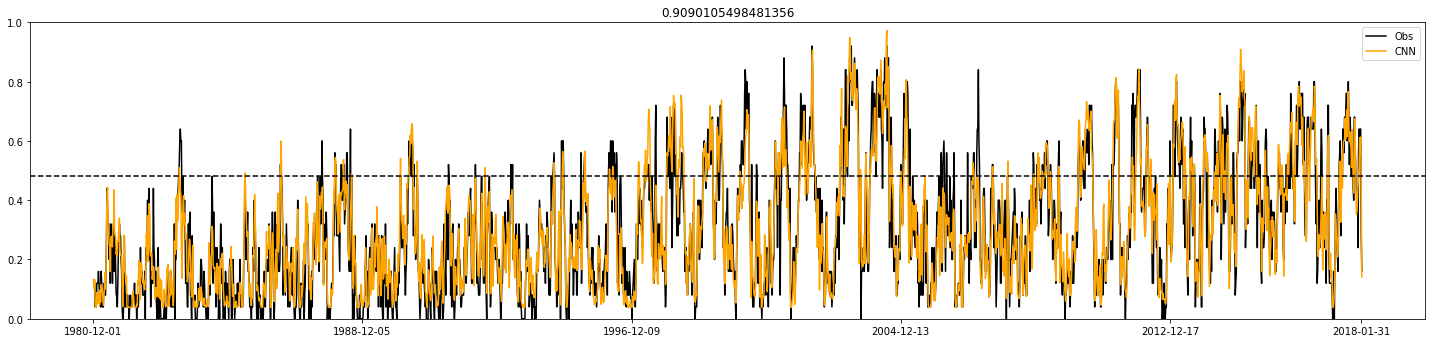

In [19]:
fig=plt.figure(figsize=[25,12])
X=np.arange(1,y.shape[0]+1)
#X=y.time.values


ax1 = fig.add_subplot(211)
ax1.plot(X,y,label='Obs',color='black')
ax1.plot(X,CNN,label='CNN',color='orange')
ax1.set_xticks([0,500,1000,1500,2000,2355])
ax1.set_xticklabels([dateString[0], dateString[500],dateString[1000], dateString[1500], dateString[2000],dateString[2355]])
l1=ax1.axhline(0.48,color='black',ls='--')
ax1.legend()
ax1.set_ylim([0, 1])
ax1.set_title(np.corrcoef(y,CNN)[0,1])
print(np.corrcoef(y,CNN))
plt.savefig('CNN_dailyTS.eps')

In [20]:
def getSeasonalCycle( dArray ):
   #"This function gives TS of categories of each type for each season e.g. if year
   #  is 1981 then it will contain values between 1dec1980 to 31jan1981"
    fg=dArray.groupby('time.dayofyear').mean()
    
    
    
    return fg

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

y
LR
SVR
CNN
[<xarray.DataArray 'fogdata' ()>
array(1.), <xarray.DataArray ()>
array(0.91596264), <xarray.DataArray ()>
array(0.92863648), <xarray.DataArray ()>
array(0.96249978)]


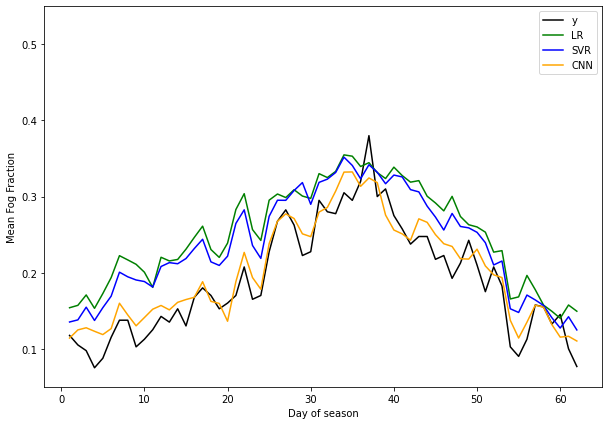

In [21]:
y   = load('ObsY.joblib').sel(time=slice('1980-12-1','1996-1-31'))
CNN = load('CNNY.joblib').sel(time=slice('1980-12-1','1996-1-31')) 
LR  = load('LRY.joblib').sel(time=slice('1980-12-1','1996-1-31')) 
SVR = load('SVRY.joblib').sel(time=slice('1980-12-1','1996-1-31')) 
#y=load('ObsY.joblib').sel(time=slice('1980-12-1','2018-1-31'))

#fig = plt.figure(figsize=(20,10))
fig = plt.figure(figsize=(10,7))
x=np.arange(1,63)
#fMean=list()
fCC=list()
OTs1=getSeasonalCycle(y)
OTs2=OTs1.roll(dayofyear=31)
OTs=OTs2[(OTs2.dayofyear<366) | (OTs2.dayofyear>366)]
classes = ['y','LR','SVR','CNN']
class_colours = ['black','green','blue','orange']
fList=(y,LR,SVR,CNN)
for (fL, cL, cO) in zip(fList,classes,class_colours):

    ts1=getSeasonalCycle(fL)
    print(cL)
    ts2=ts1.roll(dayofyear=31)
    ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    #print(xr.corr(ts, OTs))
    fCC.append(xr.corr(ts, OTs))
    #fMean.append((ts))
    plt.plot(x,ts,label=cL, color=cO)
    plt.ylim([0.05, 0.55])
    
plt.xlabel('Day of season')
plt.ylabel('Mean Fog Fraction')     
plt.legend()
print(fCC)
plt.savefig('FogFraction_SC_upto96.eps')
#plt.savefig('FogFraction_SC_legend.png')
plt.show()
#plt.legend()

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

y
LR
SVR
CNN
[<xarray.DataArray 'fogdata' ()>
array(1.), <xarray.DataArray ()>
array(0.96376725), <xarray.DataArray ()>
array(0.96606099), <xarray.DataArray ()>
array(0.97685829)]


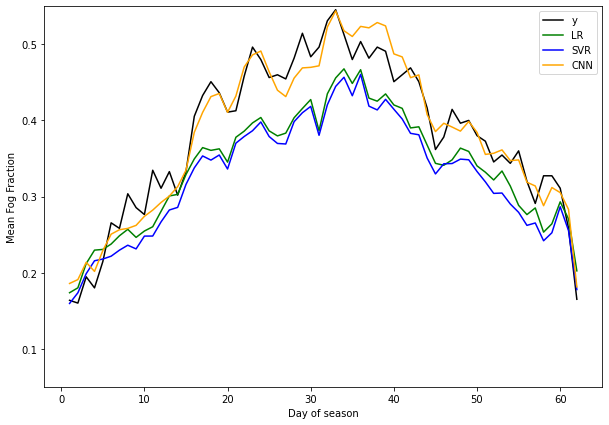

In [22]:
y   = load('ObsY.joblib').sel(time=slice('1996-12-1','2018-1-31'))
CNN = load('CNNY.joblib').sel(time=slice('1996-12-1','2018-1-31')) 
LR  = load('LRY.joblib').sel(time=slice('1996-12-1','2018-1-31')) 
SVR = load('SVRY.joblib').sel(time=slice('1996-12-1','2018-1-31')) 
#y=load('ObsY.joblib').sel(time=slice('1980-12-1','2018-1-31'))

#fig = plt.figure(figsize=(20,10))
fig = plt.figure(figsize=(10,7))
x=np.arange(1,63)
#fMean=list()
fCC=list()
OTs1=getSeasonalCycle(y)
OTs2=OTs1.roll(dayofyear=31)
OTs=OTs2[(OTs2.dayofyear<366) | (OTs2.dayofyear>366)]
classes = ['y','LR','SVR','CNN']
class_colours = ['black','green','blue','orange']
fList=(y,LR,SVR,CNN)
for (fL, cL, cO) in zip(fList,classes,class_colours):

    ts1=getSeasonalCycle(fL)
    print(cL)
    ts2=ts1.roll(dayofyear=31)
    ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    #print(xr.corr(ts, OTs))
    fCC.append(xr.corr(ts, OTs))
    #fMean.append((ts))
    plt.plot(x,ts,label=cL, color=cO)
    plt.ylim([0.05, 0.55])
    
plt.xlabel('Day of season')
plt.ylabel('Mean Fog Fraction')     
plt.legend()
print(fCC)
plt.savefig('FogFraction_SC_post96.eps')
#plt.savefig('FogFraction_SC_legend.png')
plt.show()
#plt.legend()

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

y
LR
SVR
CNN
[<xarray.DataArray 'fogdata' ()>
array(1.), <xarray.DataArray ()>
array(0.97199441), <xarray.DataArray ()>
array(0.97573545), <xarray.DataArray ()>
array(0.98594915)]


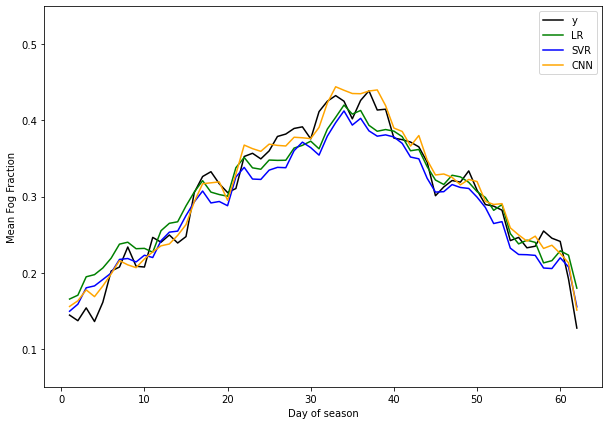

In [23]:
y   = load('ObsY.joblib').sel(time=slice('1980-12-1','2018-1-31'))
CNN = load('CNNY.joblib').sel(time=slice('1980-12-1','2018-1-31')) 
LR  = load('LRY.joblib').sel(time=slice('1980-12-1','2018-1-31')) 
SVR = load('SVRY.joblib').sel(time=slice('1980-12-1','2018-1-31'))  
#y=load('ObsY.joblib').sel(time=slice('1980-12-1','2018-1-31'))

#fig = plt.figure(figsize=(20,10))
fig = plt.figure(figsize=(10,7))
x=np.arange(1,63)
#fMean=list()
fCC=list()
OTs1=getSeasonalCycle(y)
OTs2=OTs1.roll(dayofyear=31)
OTs=OTs2[(OTs2.dayofyear<366) | (OTs2.dayofyear>366)]
classes = ['y','LR','SVR','CNN']
class_colours = ['black','green','blue','orange']
fList=(y,LR,SVR,CNN)
for (fL, cL, cO) in zip(fList,classes,class_colours):

    ts1=getSeasonalCycle(fL)
    print(cL)
    ts2=ts1.roll(dayofyear=31)
    ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    #print(xr.corr(ts, OTs))
    fCC.append(xr.corr(ts, OTs))
    #fMean.append((ts))
    plt.plot(x,ts,label=cL, color=cO)
    plt.ylim([0.05, 0.55])
    
plt.xlabel('Day of season')
plt.ylabel('Mean Fog Fraction')     
plt.legend()
print(fCC)
plt.savefig('FogFraction_SC_AllperiodObs.eps')
#plt.savefig('FogFraction_SC_legend.png')
plt.show()
#plt.legend()

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

y
LR
SVR
CNN
[<xarray.DataArray 'fogdata' ()>
array(1.), <xarray.DataArray ()>
array(0.46085936), <xarray.DataArray ()>
array(0.5225271), <xarray.DataArray ()>
array(0.63137783)]


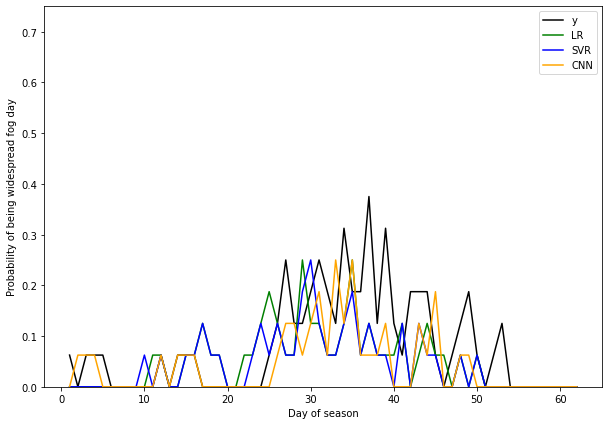

In [24]:
y   = load('ObsY.joblib').sel(time=slice('1980-12-1','1996-1-31'))
CNN = load('CNNY.joblib').sel(time=slice('1980-12-1','1996-1-31')) 
LR  = load('LRY.joblib').sel(time=slice('1980-12-1','1996-1-31')) 
SVR = load('SVRY.joblib').sel(time=slice('1980-12-1','1996-1-31')) 

y.values=y.where(y>=0.46,0)
CNN.values=CNN.where(CNN>=0.46,0)
LR.values=LR.where(LR>=0.46,0)
SVR.values=SVR.where(SVR>=0.46,0)
y.values=y.where(y==0.0,1)
CNN.values=CNN.where(CNN==0.0,1)
LR.values=LR.where(LR==0.0,1)
SVR.values=SVR.where(SVR==0.0,1)

#y=load('ObsY.joblib').sel(time=slice('1980-12-1','2018-1-31'))

#fig = plt.figure(figsize=(20,10))
fig = plt.figure(figsize=(10,7))
x=np.arange(1,63)
#fMean=list()
fCC=list()
OTs1=getSeasonalCycle(y)
OTs2=OTs1.roll(dayofyear=31)
OTs=OTs2[(OTs2.dayofyear<366) | (OTs2.dayofyear>366)]
classes = ['y','LR','SVR','CNN']
class_colours = ['black','green','blue','orange']
fList=(y,LR,SVR,CNN)
for (fL, cL, cO) in zip(fList,classes,class_colours):

    ts1=getSeasonalCycle(fL)
    print(cL)
    ts2=ts1.roll(dayofyear=31)
    ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    #print(xr.corr(ts, OTs))
    fCC.append(xr.corr(ts, OTs))
    #fMean.append((ts))
    plt.plot(x,ts,label=cL, color=cO)
    plt.ylim([0.0, 0.75])
    
plt.xlabel('Day of season')
plt.ylabel('Probability of being widespread fog day')     
plt.legend()
print(fCC)
plt.savefig('WFD_SC_upto96.eps')
#plt.savefig('FogFraction_SC_legend.png')
plt.show()
#plt.legend()

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

y
LR
SVR
CNN
[<xarray.DataArray 'fogdata' ()>
array(1.), <xarray.DataArray ()>
array(0.8112016), <xarray.DataArray ()>
array(0.83729208), <xarray.DataArray ()>
array(0.90256847)]


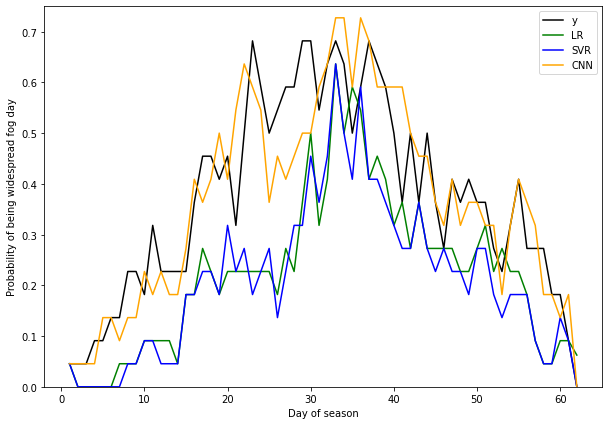

In [25]:
y   = load('ObsY.joblib').sel(time=slice('1996-12-1','2018-1-31'))
CNN = load('CNNY.joblib').sel(time=slice('1996-12-1','2018-1-31')) 
LR  = load('LRY.joblib').sel(time=slice('1996-12-1','2018-1-31')) 
SVR = load('SVRY.joblib').sel(time=slice('1996-12-1','2018-1-31')) 
#y=load('ObsY.joblib').sel(time=slice('1980-12-1','2018-1-31'))


y.values=y.where(y>=0.46,0)
CNN.values=CNN.where(CNN>=0.46,0)
LR.values=LR.where(LR>=0.46,0)
SVR.values=SVR.where(SVR>=0.46,0)
y.values=y.where(y==0.0,1)
CNN.values=CNN.where(CNN==0.0,1)
LR.values=LR.where(LR==0.0,1)
SVR.values=SVR.where(SVR==0.0,1)

#fig = plt.figure(figsize=(20,10))
fig = plt.figure(figsize=(10,7))
x=np.arange(1,63)
#fMean=list()
fCC=list()
OTs1=getSeasonalCycle(y)
OTs2=OTs1.roll(dayofyear=31)
OTs=OTs2[(OTs2.dayofyear<366) | (OTs2.dayofyear>366)]
classes = ['y','LR','SVR','CNN']
class_colours = ['black','green','blue','orange']
fList=(y,LR,SVR,CNN)
for (fL, cL, cO) in zip(fList,classes,class_colours):

    ts1=getSeasonalCycle(fL)
    print(cL)
    ts2=ts1.roll(dayofyear=31)
    ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    #print(xr.corr(ts, OTs))
    fCC.append(xr.corr(ts, OTs))
    #fMean.append((ts))
    plt.plot(x,ts,label=cL, color=cO)
    plt.ylim([0., 0.75])
    
plt.xlabel('Day of season')
plt.ylabel('Probability of being widespread fog day')     
plt.legend()
print(fCC)
plt.savefig('WFD_SC_post96.eps')
#plt.savefig('FogFraction_SC_legend.png')
plt.show()
#plt.legend()

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

y
LR
SVR
CNN
[<xarray.DataArray 'fogdata' ()>
array(1.), <xarray.DataArray ()>
array(0.8555963), <xarray.DataArray ()>
array(0.87664419), <xarray.DataArray ()>
array(0.90461747)]


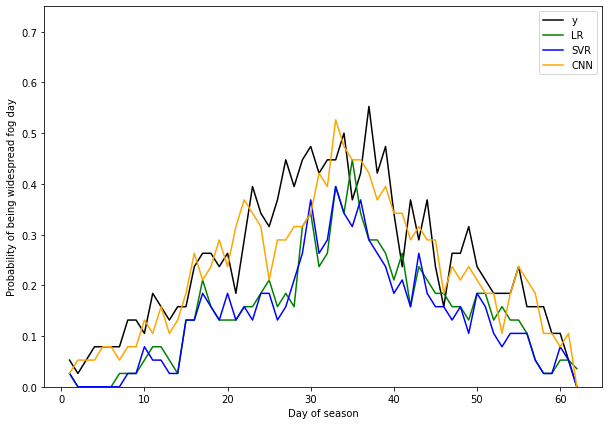

In [26]:
y   = load('ObsY.joblib').sel(time=slice('1980-12-1','2018-1-31'))
CNN = load('CNNY.joblib').sel(time=slice('1980-12-1','2018-1-31')) 
LR  = load('LRY.joblib').sel(time=slice('1980-12-1','2018-1-31')) 
SVR = load('SVRY.joblib').sel(time=slice('1980-12-1','2018-1-31'))  
#y=load('ObsY.joblib').sel(time=slice('1980-12-1','2018-1-31'))

y.values=y.where(y>=0.46,0)
CNN.values=CNN.where(CNN>=0.46,0)
LR.values=LR.where(LR>=0.46,0)
SVR.values=SVR.where(SVR>=0.46,0)
y.values=y.where(y==0.0,1)
CNN.values=CNN.where(CNN==0.0,1)
LR.values=LR.where(LR==0.0,1)
SVR.values=SVR.where(SVR==0.0,1)

#fig = plt.figure(figsize=(20,10))
fig = plt.figure(figsize=(10,7))
x=np.arange(1,63)
#fMean=list()
fCC=list()
OTs1=getSeasonalCycle(y)
OTs2=OTs1.roll(dayofyear=31)
OTs=OTs2[(OTs2.dayofyear<366) | (OTs2.dayofyear>366)]
classes = ['y','LR','SVR','CNN']
class_colours = ['black','green','blue','orange']
fList=(y,LR,SVR,CNN)
for (fL, cL, cO) in zip(fList,classes,class_colours):

    ts1=getSeasonalCycle(fL)
    print(cL)
    ts2=ts1.roll(dayofyear=31)
    ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    #print(xr.corr(ts, OTs))
    fCC.append(xr.corr(ts, OTs))
    #fMean.append((ts))
    plt.plot(x,ts,label=cL, color=cO)
    plt.ylim([0.0, 0.75])
    
plt.xlabel('Day of season')
plt.ylabel('Probability of being widespread fog day')     
plt.legend()
print(fCC)
plt.savefig('WFD_SC_AllperiodObs.eps')
#plt.savefig('FogFraction_SC_legend.png')
plt.show()
#plt.legend()